In [18]:
import pandas as pd

In [19]:
data=pd.read_csv('data.csv')


In [20]:
data.drop_duplicates(inplace=True,subset=['name'])


In [21]:
name=data['name']

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [23]:
col_features = ['danceability', 'energy', 'valence', 'loudness']
X = MinMaxScaler().fit_transform(data[col_features])
kmeans = KMeans(init="k-means++",
                n_clusters=2,
                random_state=15).fit(X)
data['kmeans'] = kmeans.labels_

In [24]:
data['song_name']=name

In [25]:
cluster=data.groupby(by=data['kmeans'])

In [26]:
y=data.pop('kmeans')
x=data.drop(columns=['name','artists','id','release_date','song_name'])

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [28]:
! pip install lightgbm

In [29]:
from lightgbm import LGBMClassifier
model=LGBMClassifier().fit(x_train,y_train)

In [30]:
model.score(x_train,y_train)

0.9991173963191414

In [31]:
model.score(x_test,y_test)


0.9949751767714758

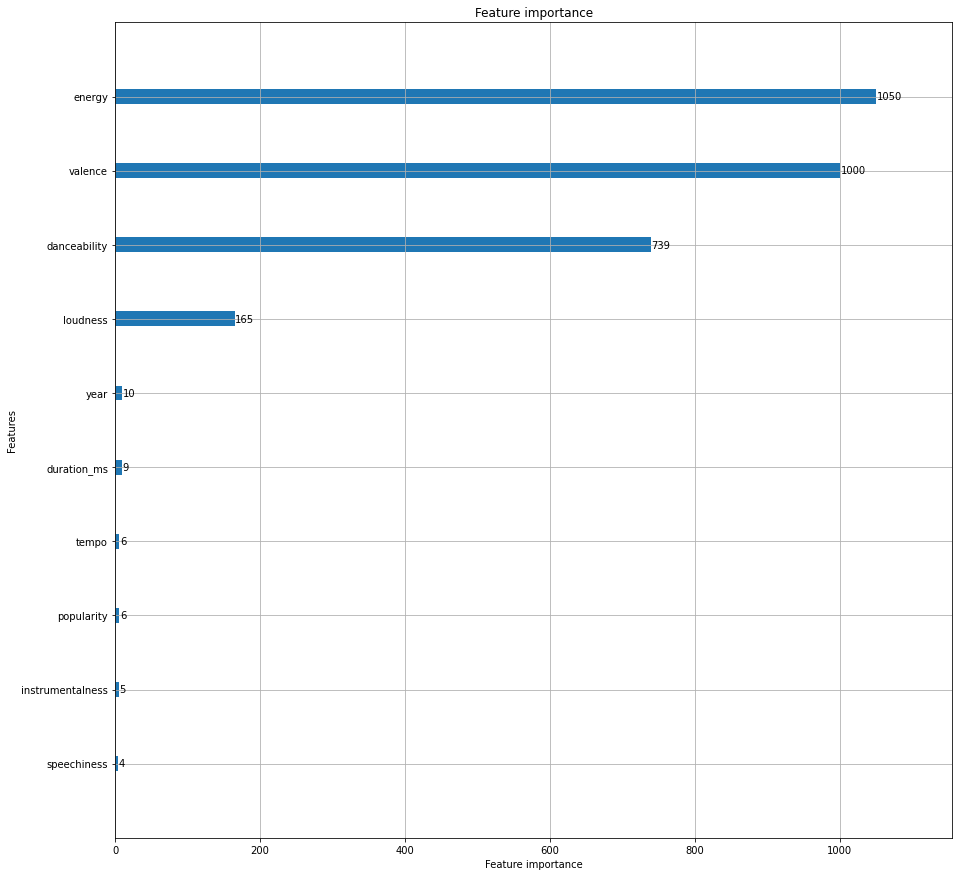

In [32]:
import lightgbm
import matplotlib.pyplot as plt
ax = lightgbm.plot_importance(model, max_num_features=10, figsize=(15,15))
plt.show()

In [33]:
df=cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))
df.reset_index(level=0, inplace=True)

In [35]:
! pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=7cdb3257aeb332ecaf84c29428d481617487d4fd8e397996c426f5d27c296ff0
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\85\cf\3a\e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [37]:
from keras.preprocessing.image import img_to_array
import imutils
from keras.models import load_model
import numpy as np
import cv2

ImportError: cannot import name 'img_to_array' from 'keras.preprocessing.image' (c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py)

In [1]:
emotion_word=emotion_testing()
if emotion_word=='sad':
    emotion_code=0
else:
    emotion_code=1

NameError: name 'emotion_testing' is not defined

In [ ]:
def get_results(emotion_code):
  NUM_RECOMMEND=10
  happy_set=[]
  sad_set=[]
  if emotion_code==0:
      happy_set.append(df[df['kmeans']==0]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(happy_set).T
  else:
      sad_set.append(df[df['kmeans']==1]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(sad_set).T

In [38]:

print(get_results(emotion_code))
if emotion_word=='sad':
    print('emotion detected is SAD')
else:
    print('emotion detected is HAPPY')

NameError: name 'get_results' is not defined